In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

In [4]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
print(f"Unique categories in gender: {data['gender'].unique()}")
print(f"Unique categories in Race: {data['race_ethnicity'].unique()}")
print(f"Unique categories in Level: {data['parental_level_of_education'].unique()}")
print(f"Unique categories in Lunch: {data['lunch'].unique()}")
print(f"Unique categories in Test: {data['test_preparation_course'].unique()}")

Unique categories in gender: ['female' 'male']
Unique categories in Race: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique categories in Level: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique categories in Lunch: ['standard' 'free/reduced']
Unique categories in Test: ['none' 'completed']


In [10]:
numeric_feature = [col for col in data.columns if data[col].dtypes != 'O']
categorical_feature = [col for col in data.columns if data[col].dtype == 'O']

print(f"We have {len(numeric_feature)} numerical features")
print(f"We have {len(categorical_feature)} categorical features")

We have 3 numerical features
We have 5 categorical features


In [11]:
print(numeric_feature)
print(categorical_feature)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
data['Total_score'] = (data['math_score'] + data['reading_score'] + data['writing_score'])
data['Avg_score'] = data['Total_score']/3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = data[data['reading_score'] == 100]['Avg_score'].count()
writing_full = data[data['writing_score'] == 100]['Avg_score'].count()
maths_full = data[data['math_score'] == 100]['Avg_score'].count()

print(f"Total students scoring full marks in reading: {reading_full}")
print(f"Total students scoring full marks in writing: {writing_full}")
print(f"Total students scoring full marks in maths: {maths_full}")

Total students scoring full marks in reading: 17
Total students scoring full marks in writing: 14
Total students scoring full marks in maths: 7


In [14]:
reading_less_20 = data[data['reading_score'] < 20]['Avg_score'].count()
writing_less_20 = data[data['writing_score'] < 20]['Avg_score'].count()
maths_less_20 = data[data['math_score'] < 20]['Avg_score'].count()

print(f"Total students scoring less than 20 marks in reading: {reading_less_20}")
print(f"Total students scoring less than 20 marks in writing: {writing_less_20}")
print(f"Total students scoring less than 20 marks in maths: {maths_less_20}")

Total students scoring less than 20 marks in reading: 1
Total students scoring less than 20 marks in writing: 3
Total students scoring less than 20 marks in maths: 4


## EDA

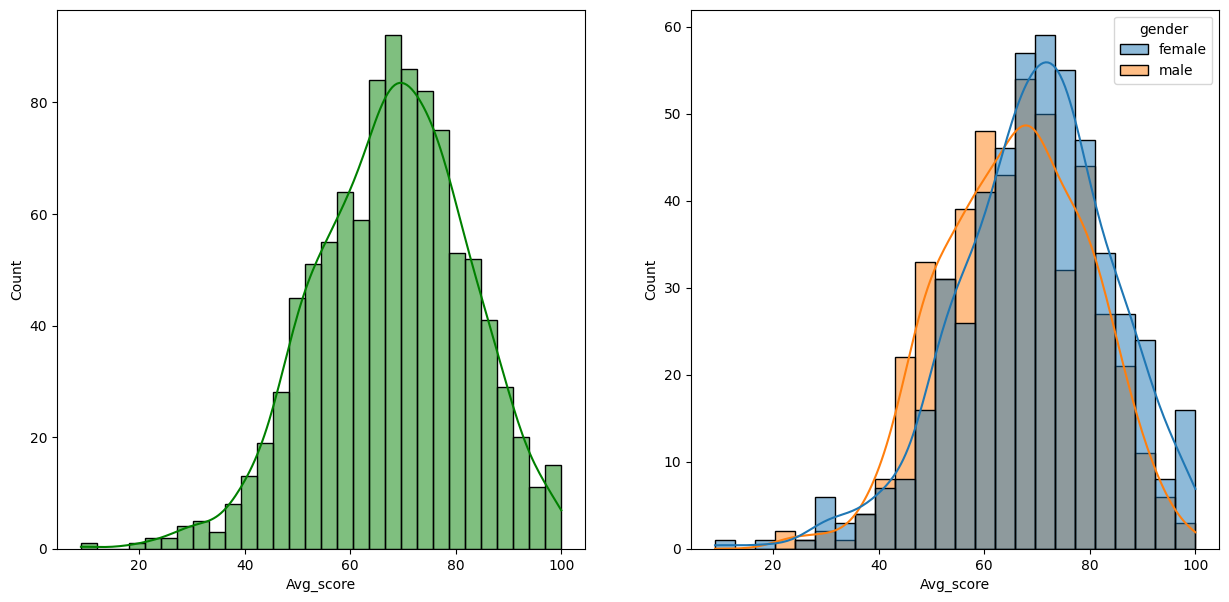

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data, x='Avg_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data, x='Avg_score', kde=True, hue='gender')
plt.show()

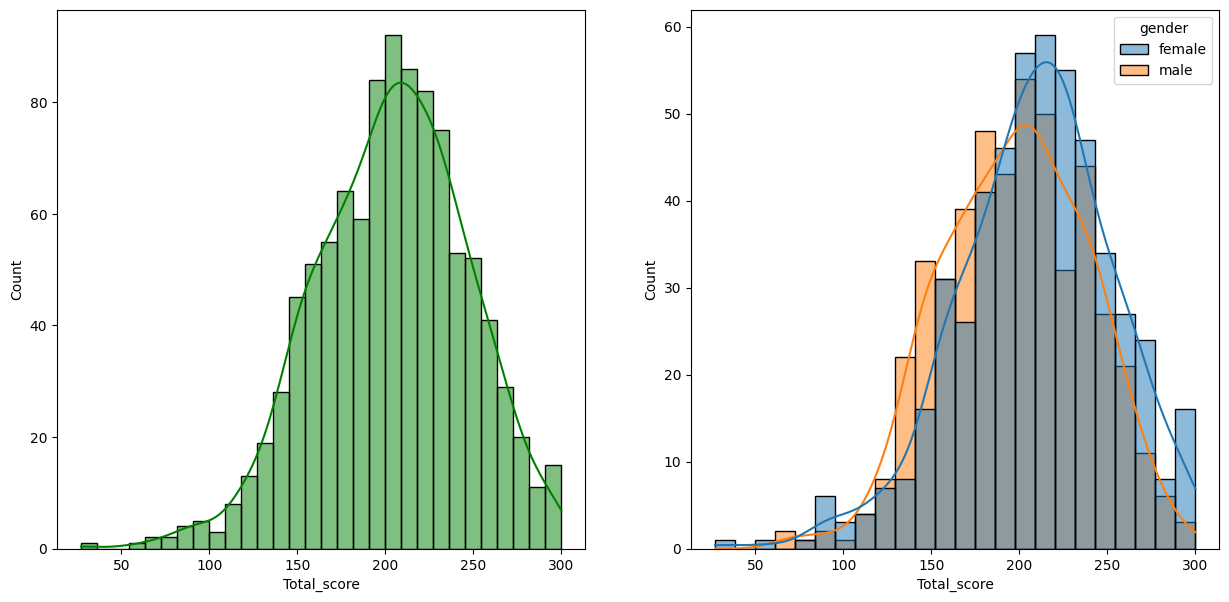

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data, x='Total_score', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data, x='Total_score', kde=True, hue='gender')
plt.show()

#### Insights
* Female students tend to perform better than male students

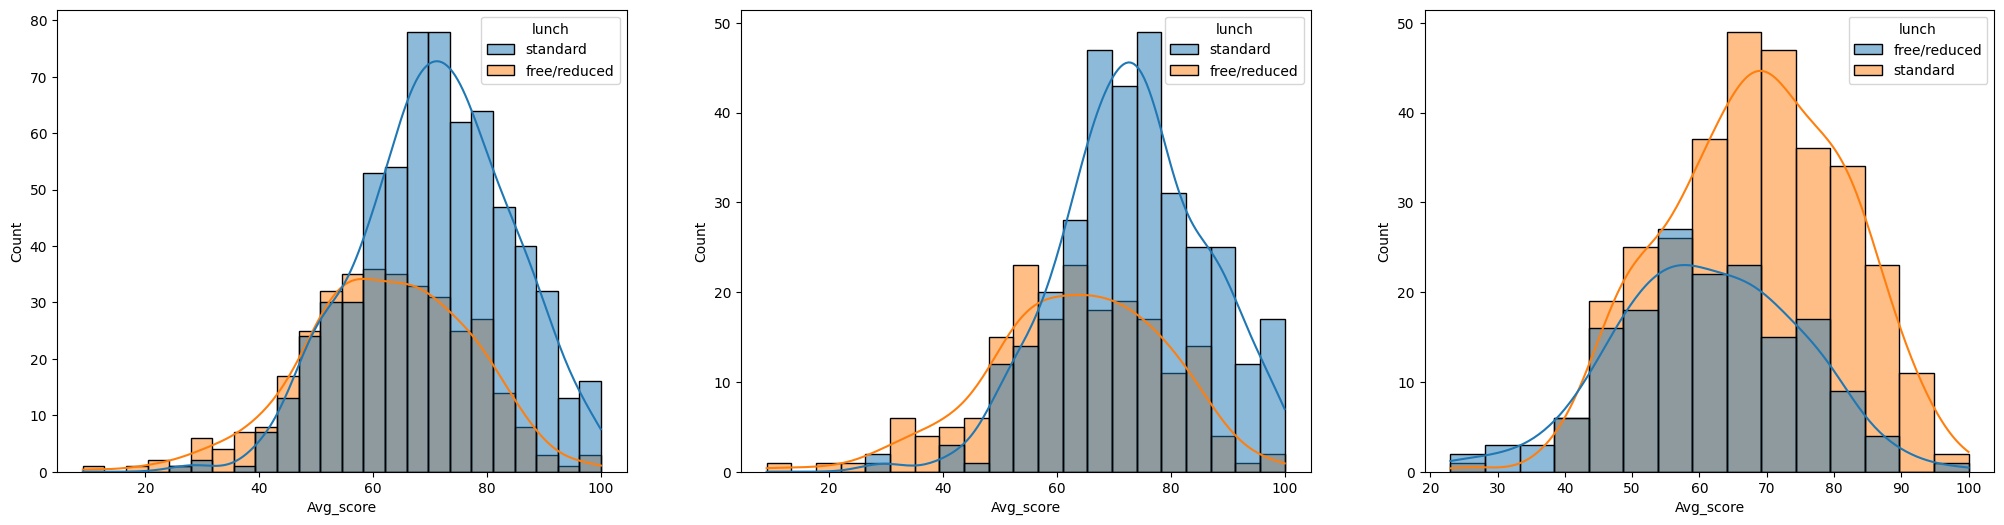

In [17]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data, x='Avg_score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data[data['gender'] == 'female'], x='Avg_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data[data['gender'] == 'male'], x='Avg_score', kde=True, hue='lunch')
plt.show()



#### Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams for both male and female.

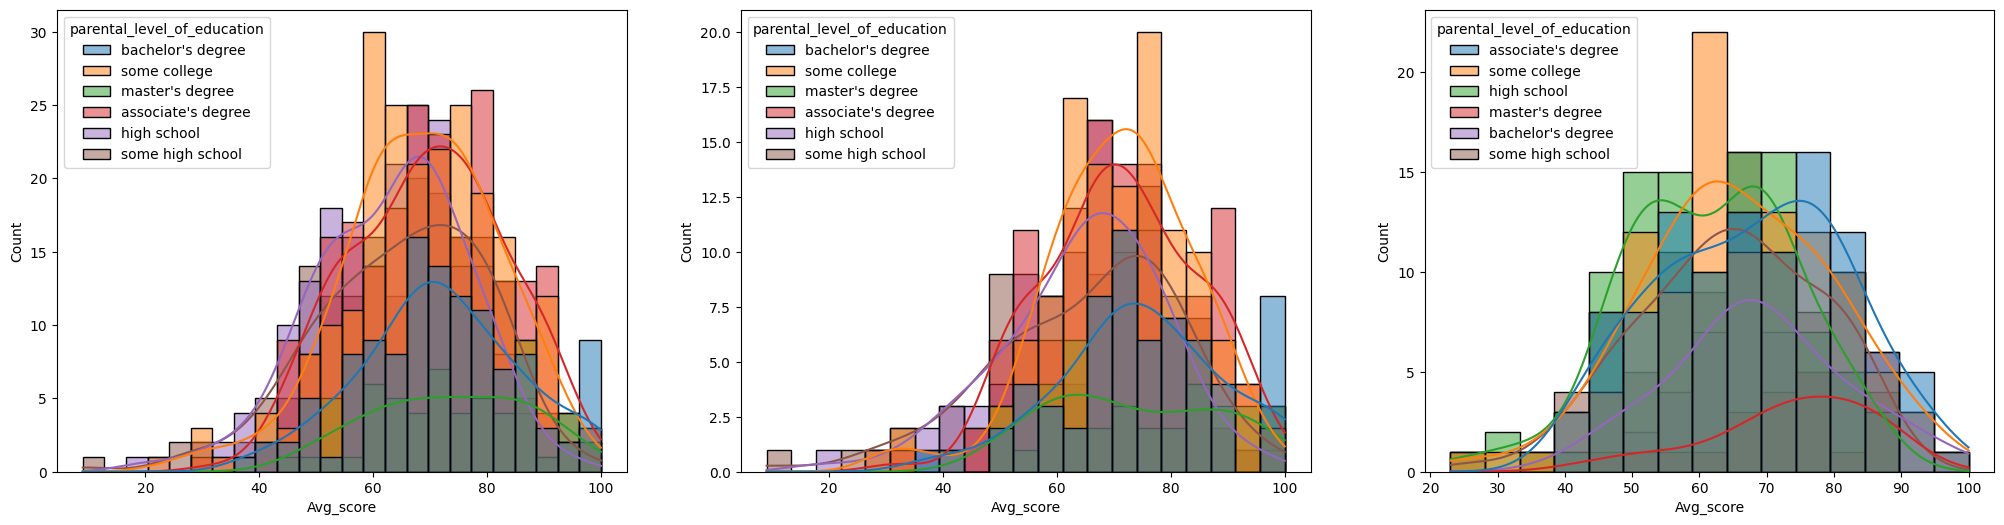

In [18]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
ax = sns.histplot(data, x='Avg_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
ax = sns.histplot(data[data['gender'] == 'female'], x='Avg_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
ax = sns.histplot(data[data['gender'] == 'male'], x='Avg_score', kde=True, hue='parental_level_of_education')
plt.show()

#### Insights
* In general parent's education doesn't help student perform well in exam.
* 2nd plot shows that parents whose education is of associate degree or master's degree their male child tend to perform well in exam.
* 3rd plot we can see there is no effect of parent's education on female students.  

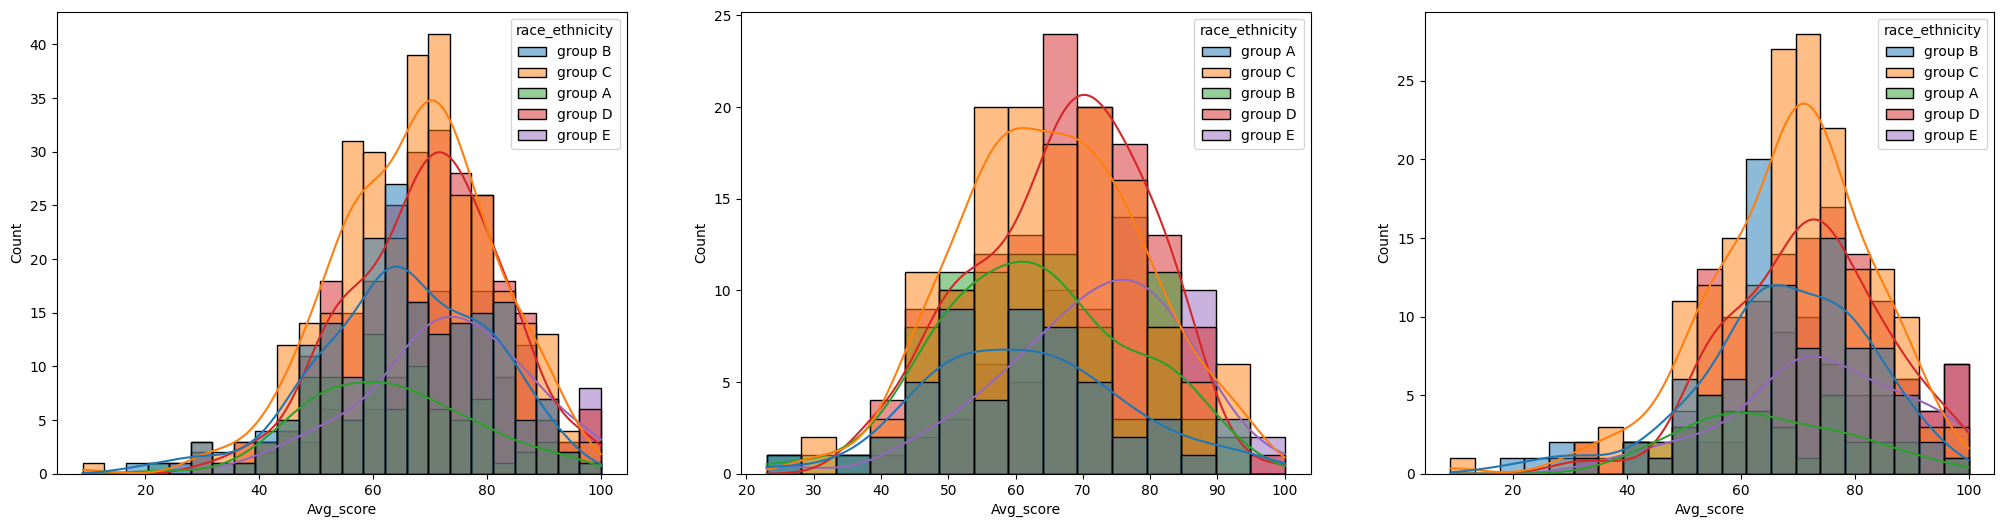

In [19]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data, x='Avg_score', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data[data['gender'] == 'male'], x='Avg_score', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data[data['gender'] == 'female'], x='Avg_score', kde=True, hue='race_ethnicity')
plt.show()

#### Insights
* Group A and B students tend to perform poorly in exam.
* Group A and B students tend to perform poorly in exam irrespective of their gender.

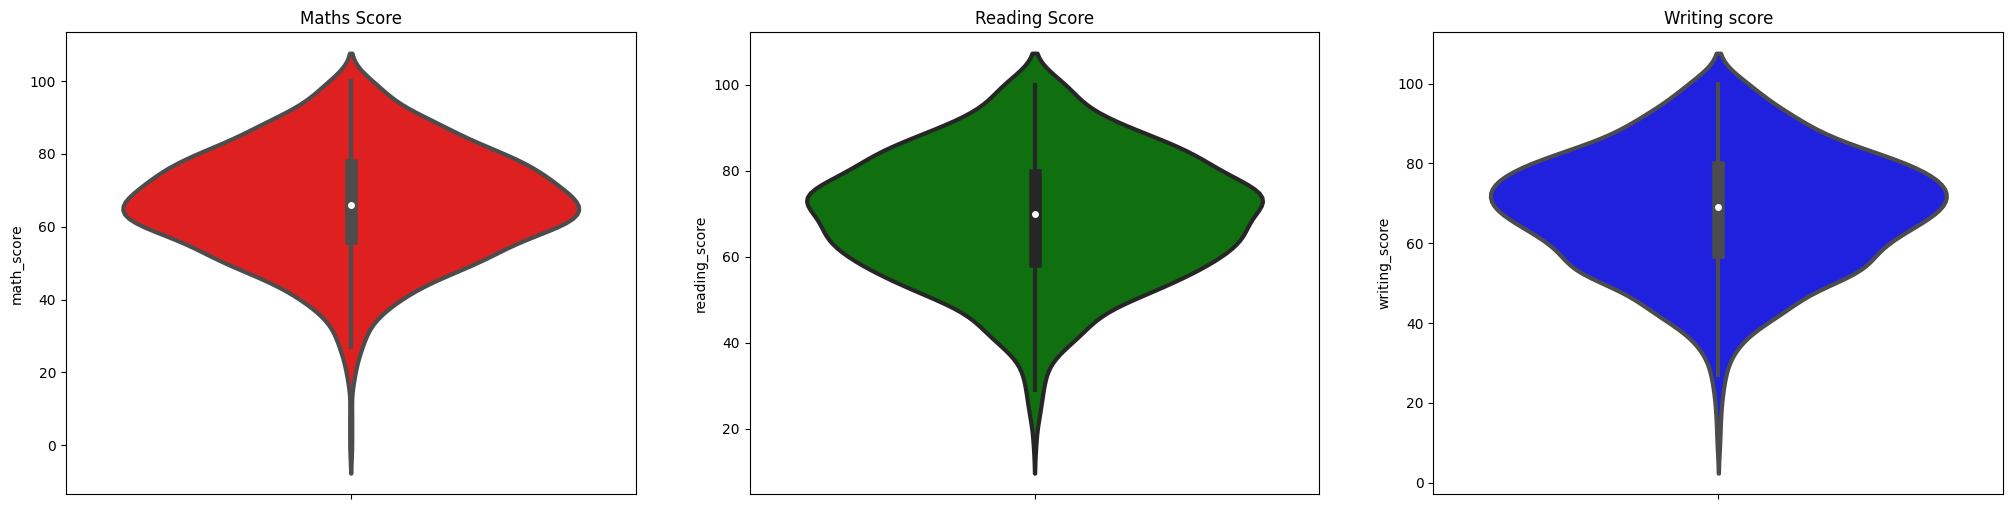

In [20]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
plt.title("Maths Score")
sns.violinplot(data, y='math_score', color='red', linewidth=3)
plt.subplot(132)
plt.title("Reading Score")
sns.violinplot(data, y='reading_score', color='green', linewidth=3)
plt.subplot(133)
plt.title("Writing score")
sns.violinplot(data, y='writing_score', color='blue', linewidth=3)
plt.show()

#### Insights
* Most of the students score in between 60-80 marks in Maths whereas in reading and writing most of them score between 50-80.

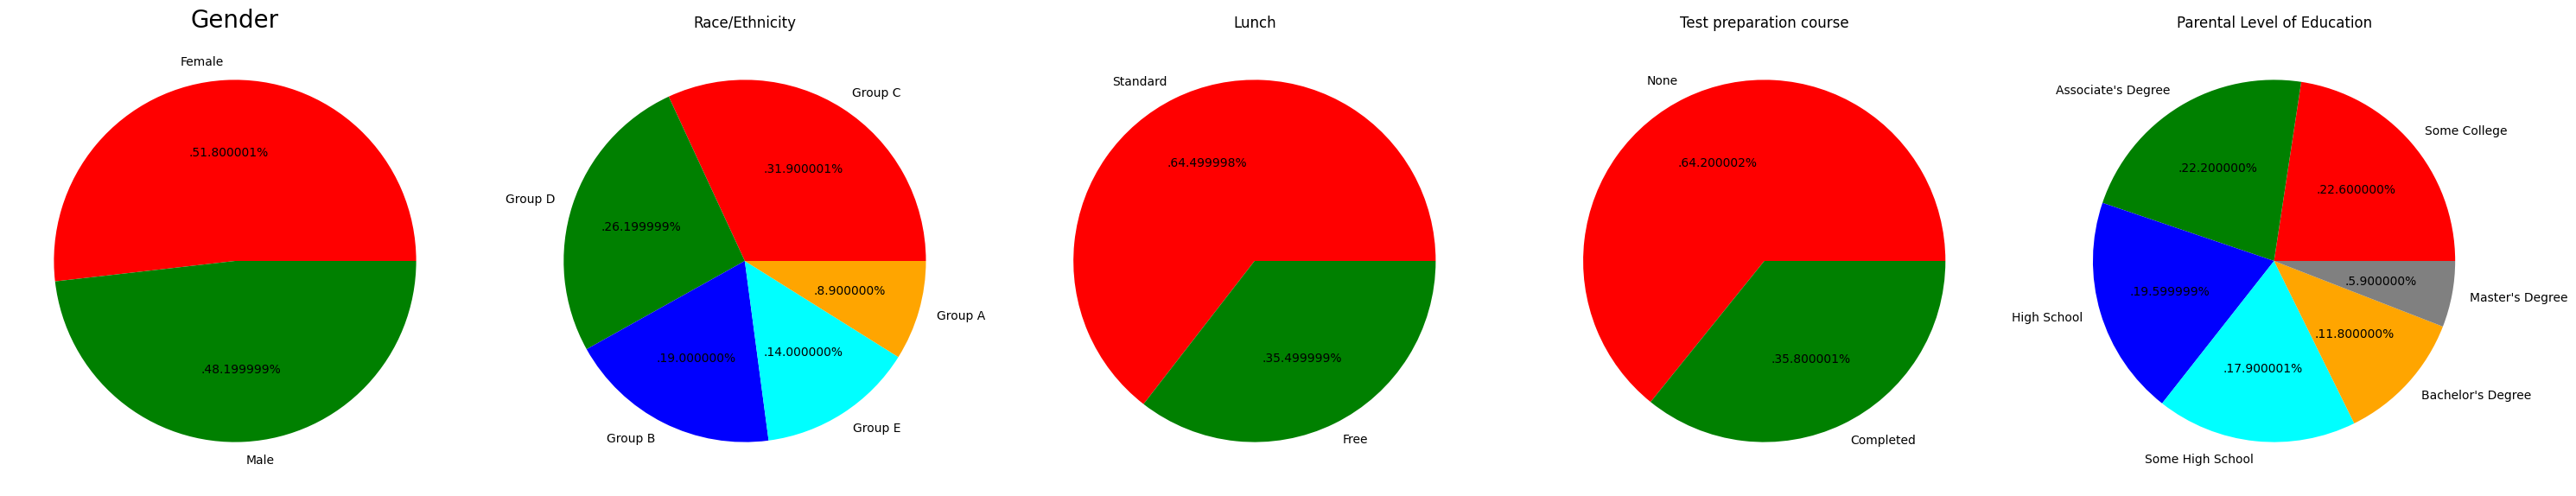

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(151)
size = data['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'green']


plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(152)
size = data['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity')
plt.axis('off')

plt.subplot(153)
size = data['lunch'].value_counts()
labels = ['Standard', 'Free']
color =  ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch')
plt.axis('off')

plt.subplot(154)
size = data['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test preparation course')
plt.axis('off')

plt.subplot(155)
size = data['parental_level_of_education'].value_counts()
labels = ['Some College', 'Associate\'s Degree', 'High School', 'Some High School', 'Bachelor\'s Degree', 'Master\'s Degree']
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Level of Education')
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

#### Insights
* Number of Male and Female students are almost equal.
* Number of students are maximum in Group-C.
* Number of students who have standard lunch are greater.
* Number of students who have not enrolled in any test preaparation course is large.
* Number of students whose parental education is 'Some College' is greater followed closely by 'Associate's Degree'.

## Feature Wise Visualization

### Gender Column

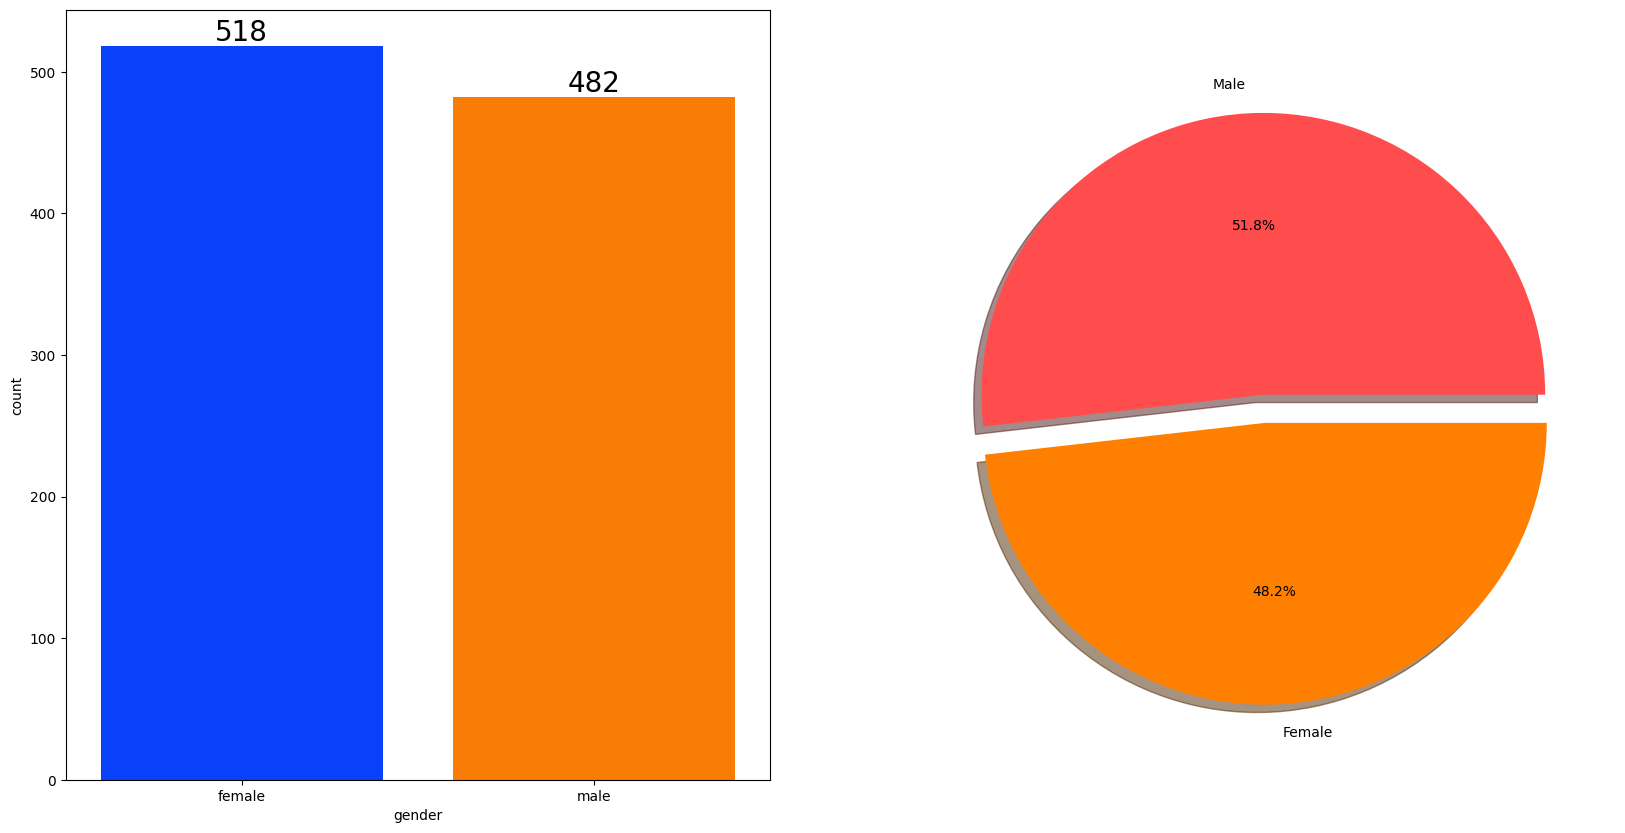

In [22]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Race/Ethnicity

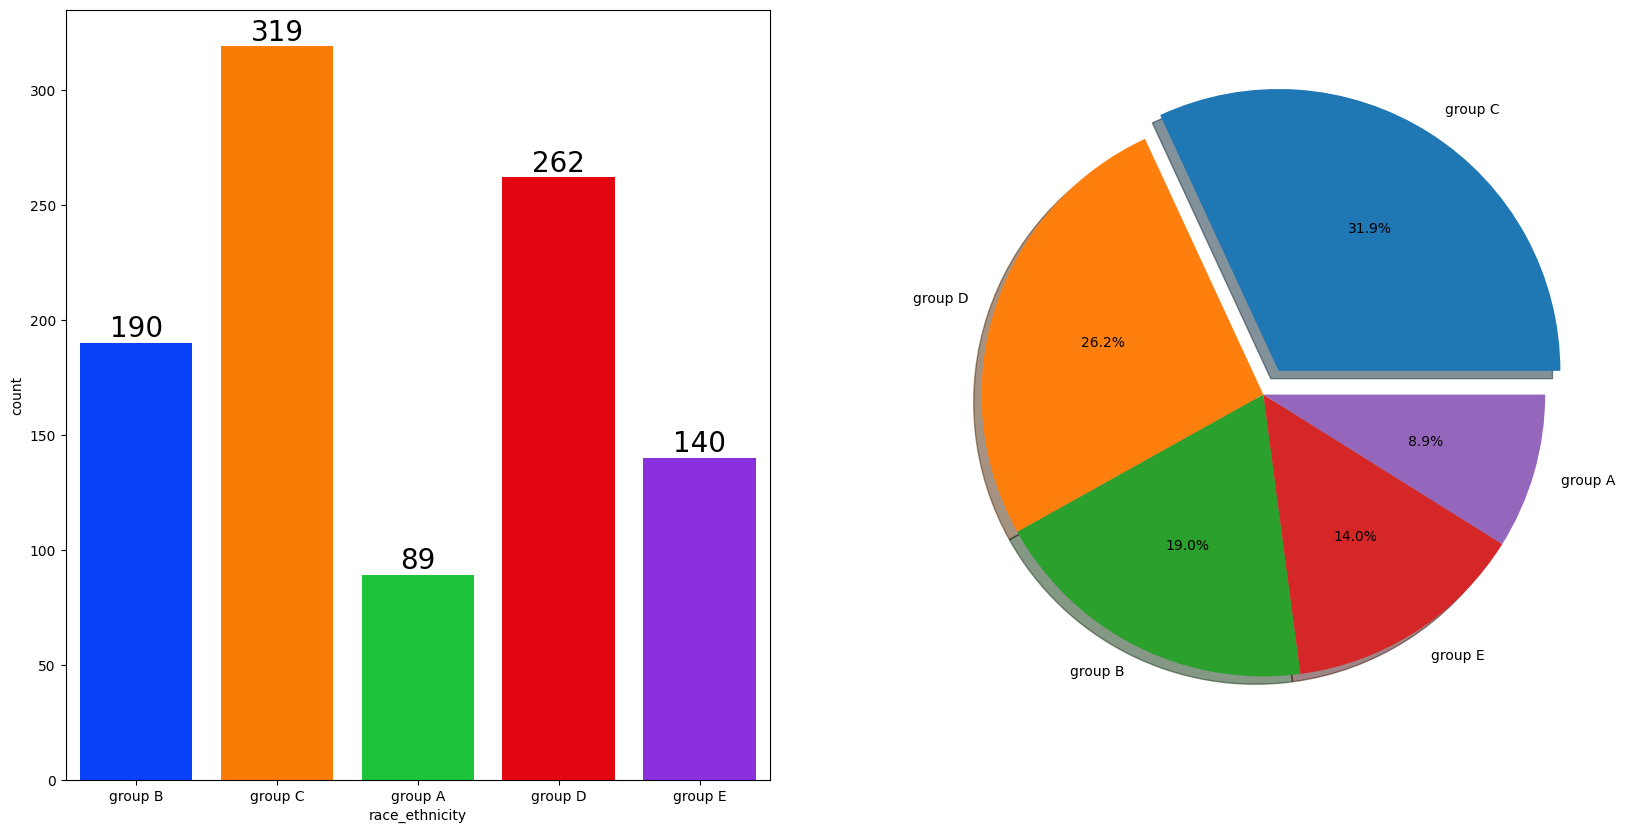

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race_ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

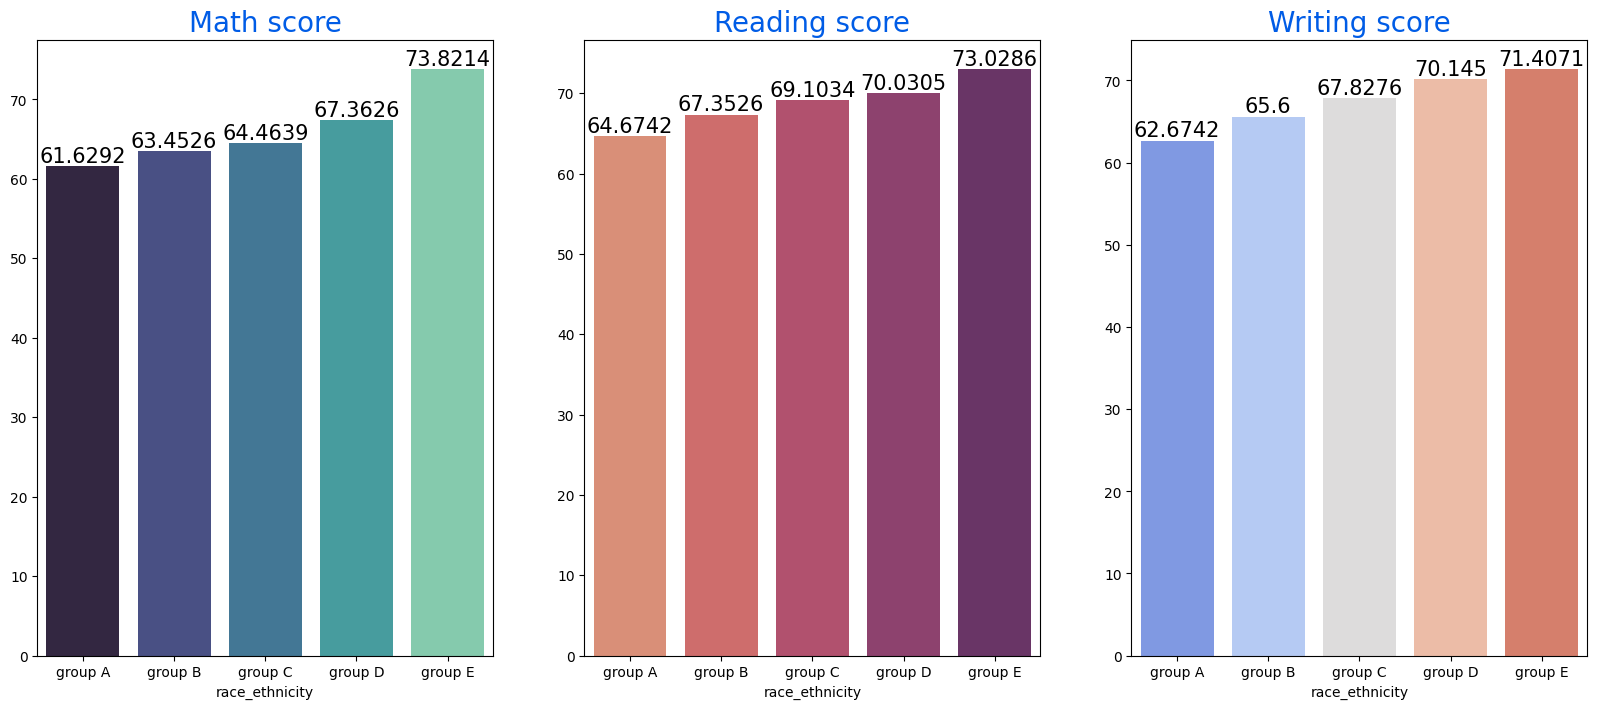

In [24]:

Group_data2=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Parental Level of Education

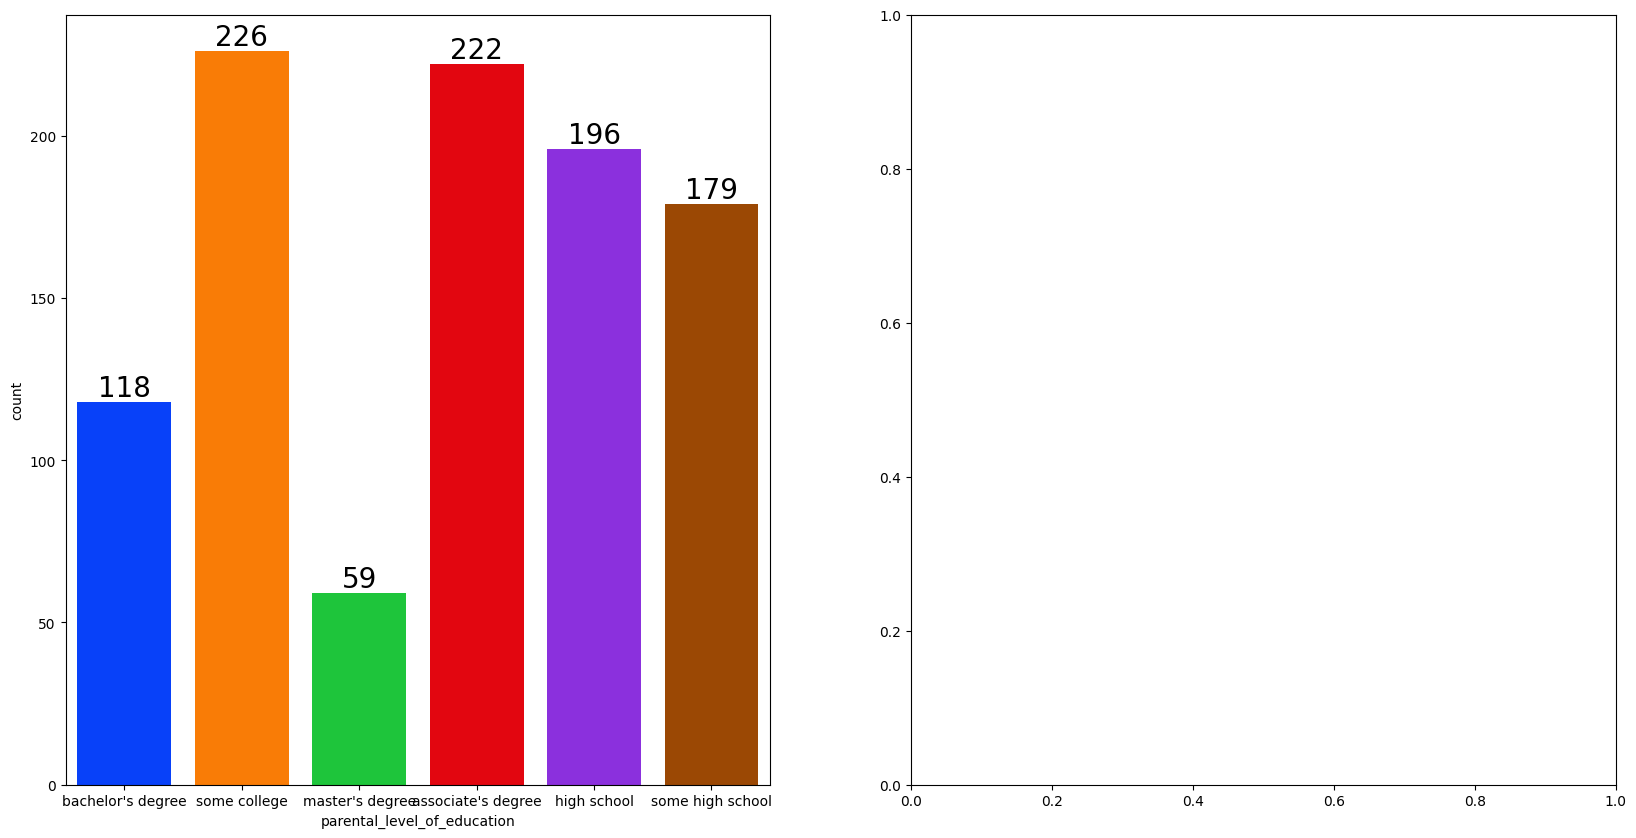

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

### Lunch

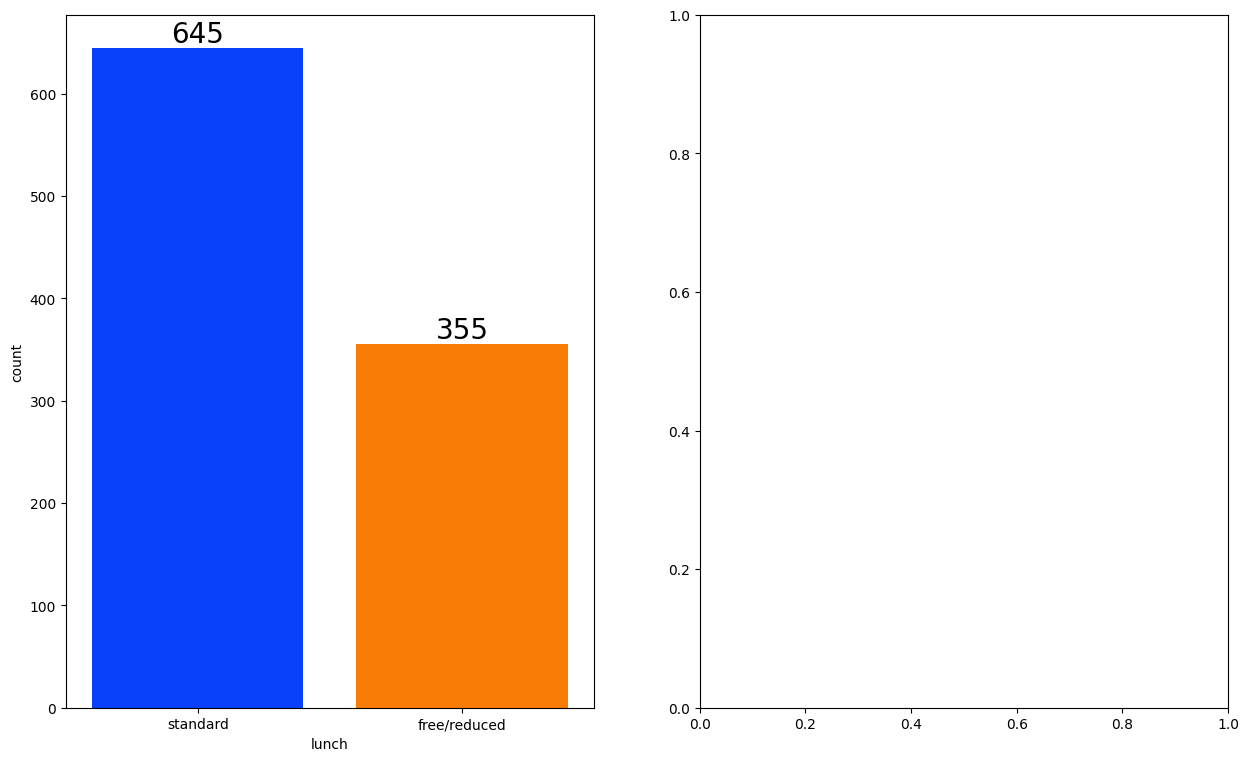

In [33]:
f,ax=plt.subplots(1,2,figsize=(15,9))
sns.countplot(x=data['lunch'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

### Test Preparation Course

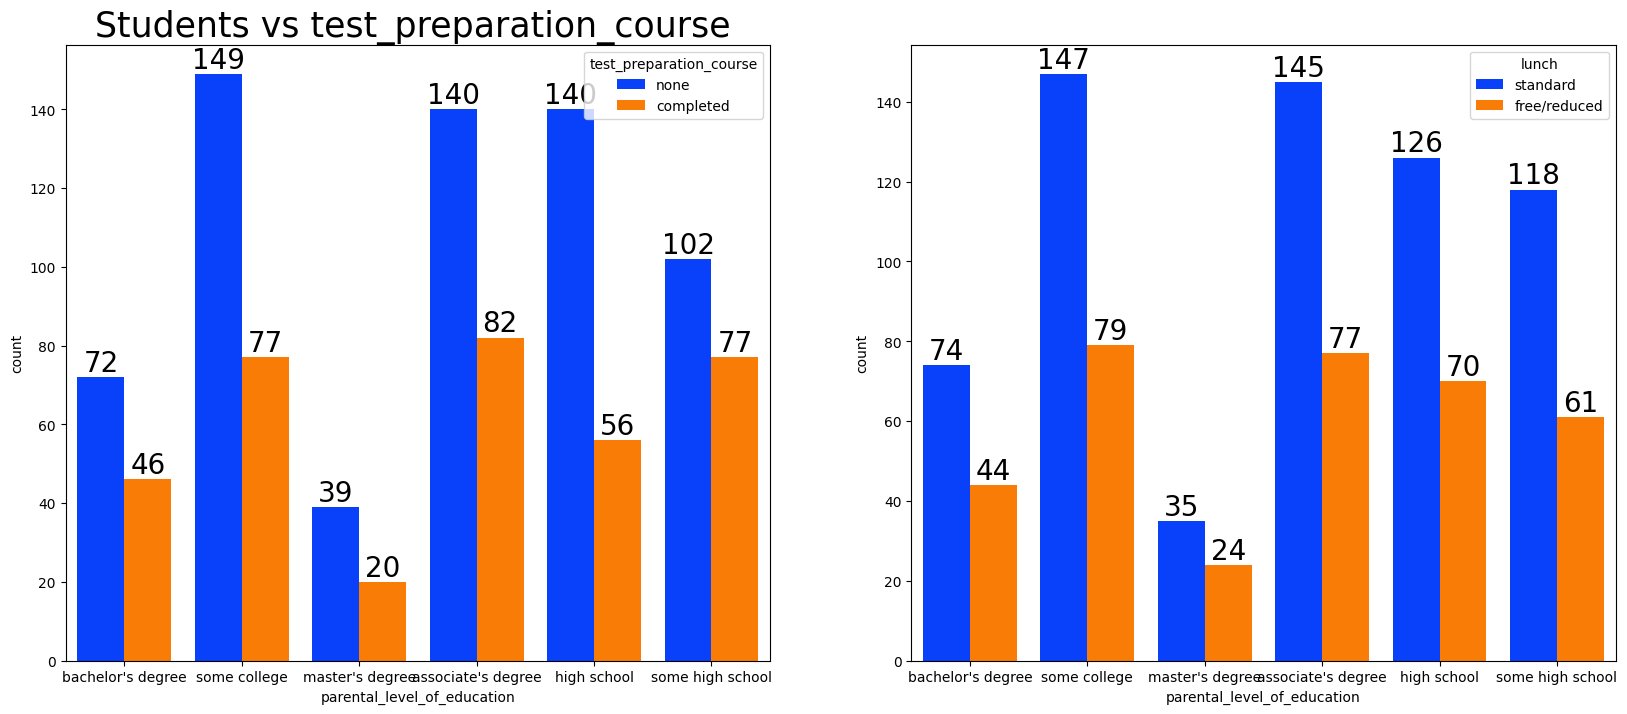

In [37]:

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test_preparation_course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

<Axes: xlabel='lunch', ylabel='writing_score'>

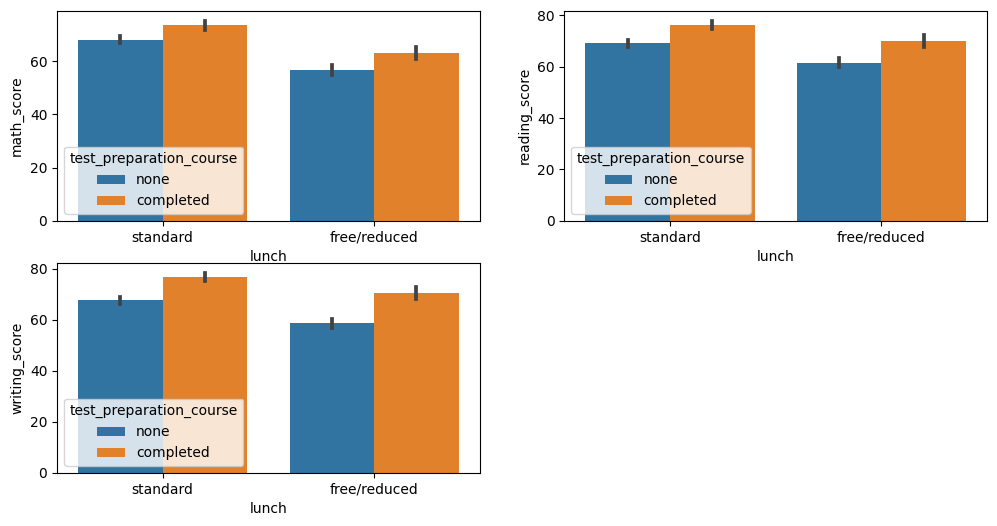

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing_score'], hue=data['test_preparation_course'])

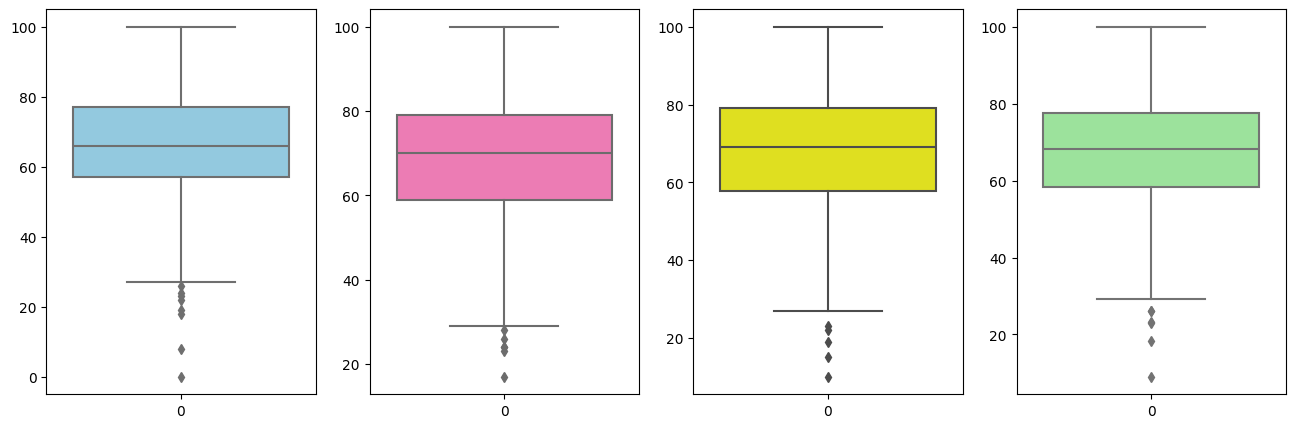

In [40]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['Avg_score'],color='lightgreen')
plt.show()

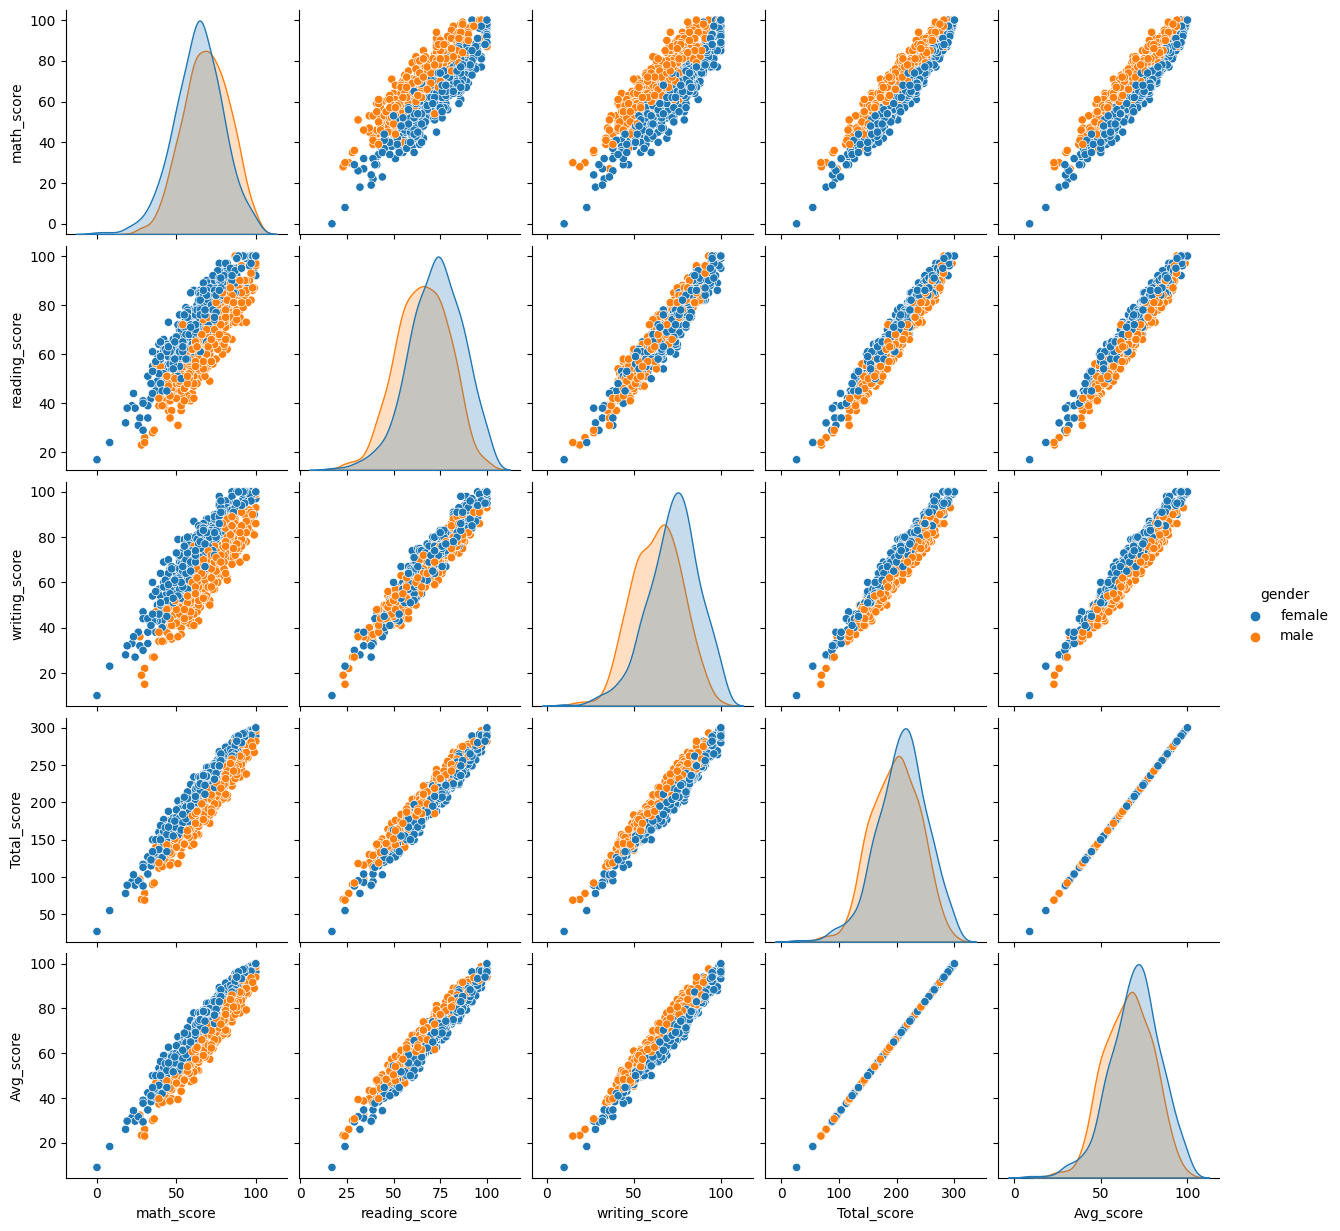

In [41]:
sns.pairplot(data,hue = 'gender')
plt.show()